#### The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

1. Load the dataset, check its shape, Perform EDA using Pandas Profiling - Intermediate
2. Rectify the data of the first four columns - Intermediate
3. Create new features using the 'Data' feature and the make 'Data' column as index - Intermediate
4. Handle null and duplicate values - Beginner
5. Check the data-type of the features and convert them to appropriate data type - Beginner
6. Analyze features with outlier values - Intermediate
7. Plot and analyze correlation - Beginner
8. Split the dataset for training and testing - Beginner
9. Train a linear regression model and print the intercept and coefficients - Beginner
10. Evaluate the model using R2 score, mean absolute error, and root mean squared error - Beginner

Data collection

Data analysis

Data wrangling/Feature engineering

Train/Test Algorithms

Predicting using the trained model

Evaluating a model: R2-score, Mean Absolute Error, and root mean squared error

In [1]:
import pandas as pd
df1 = pd.read_csv('Consumo_cerveja.csv',parse_dates=['Data'])

In [2]:
df1['Temperatura Media (C)']=df1['Temperatura Media (C)'].str.replace(',','.')
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].str.replace(',','.')
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].str.replace(',','.')
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].str.replace(',','.')

In [3]:
df1.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21,28.3,0,0,28.900


Create new feature 'Month' from the dates, consisting of the month of the year

Create new feature 'Day' from the dates, consisting of the day of the week

Set values from 'Data' column as indexes

In [4]:
df1['Month']=df1.Data.dt.month
df1['day']=df1.Data.dt.dayofweek
df1.iloc[335:341]

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
335,2015-12-02,22.1,18.2,29.4,0,0,30.471,12,2
336,2015-12-03,22.44,20.2,26.1,0,0,28.405,12,3
337,2015-12-04,22.76,19,29.1,0,0,29.513,12,4
338,2015-12-05,24.8,19.5,30.6,0.1,1,32.451,12,5
339,2015-12-06,23.12,20.6,28,0.1,1,32.780,12,6
340,2015-12-07,20.04,18,23.9,47.8,0,23.375,12,0


In [5]:
df1.set_index('Data',inplace=True)

### Handle null values

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    object 
 1   Temperatura Minima (C)       365 non-null    object 
 2   Temperatura Maxima (C)       365 non-null    object 
 3   Precipitacao (mm)            365 non-null    object 
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    int32  
 7   day                          365 non-null    int32  
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 22.8+ KB


In [7]:
print(df1.isnull().all(axis=1).sum()) # calculate the number of rows which have null values in all columns

0


In [8]:
df1.shape

(365, 8)

In [9]:
if df1.duplicated().any():
    print('True: duplicate instances')
else:
    print('False: No duplicate instances')

False: No duplicate instances


### Check the data-types of the features

#### Convert them to appropriate data types

In [10]:
df1['Temperatura Media (C)']=df1[['Temperatura Media (C)']].astype(float)
df1['Temperatura Minima (C)'] = df1['Temperatura Minima (C)'].astype(float)
df1['Temperatura Maxima (C)'] = df1['Temperatura Maxima (C)'].astype(float)
df1['Precipitacao (mm)'] = df1['Precipitacao (mm)'].astype(float)
# Final de semana is a categorical column(like yes or no) so it should be int, not float
df1['Final de Semana'] = df1['Final de Semana'].astype(int)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int64  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    int32  
 7   day                          365 non-null    int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 22.8 KB


In [12]:
df1.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,day
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0


### Handle Outlier Data

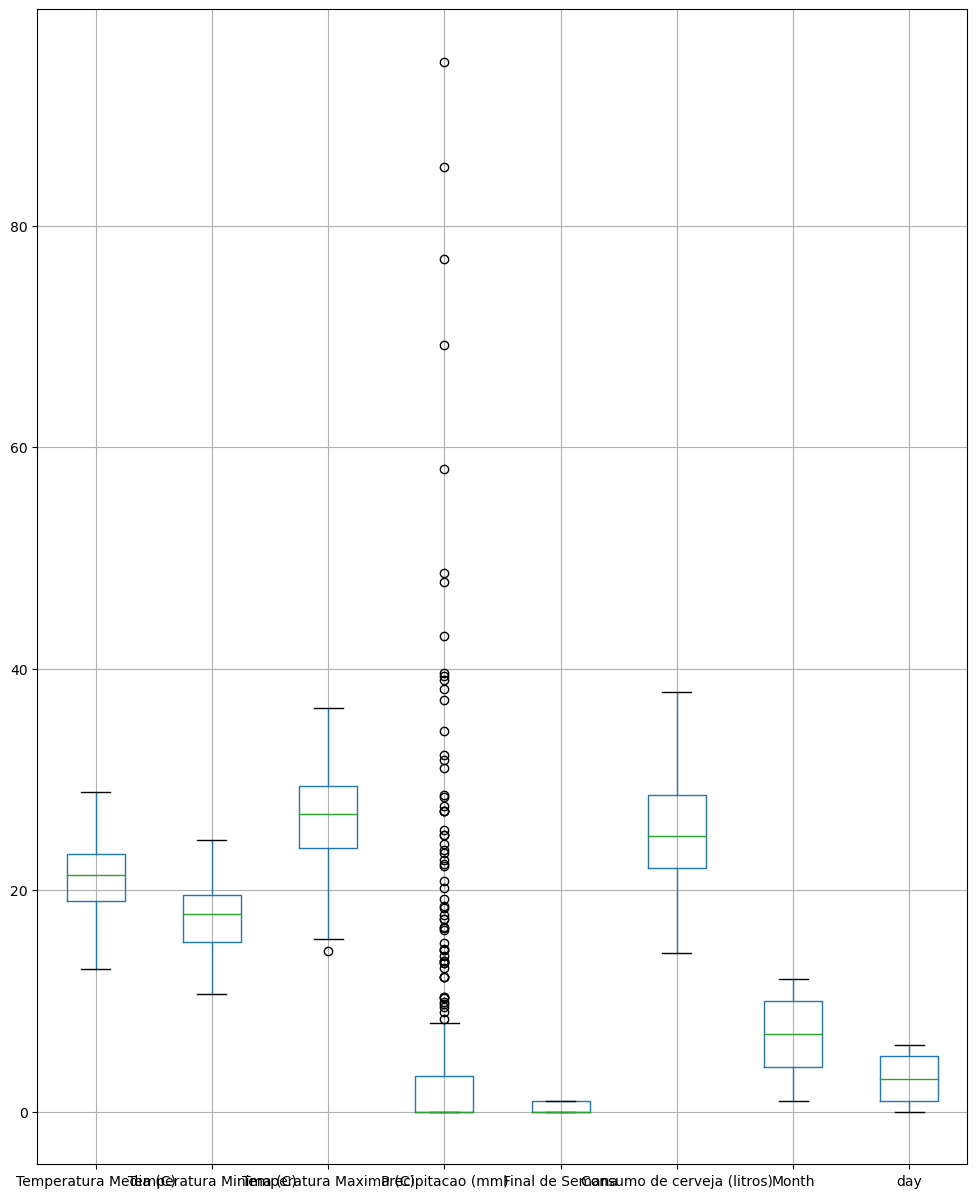

In [13]:
import matplotlib.pyplot as plt
df1.boxplot(figsize=(12,15))
plt.show()

#### Column 'Precipitacio' seems to have lots of outlier. Let's try to understand this using the distribution of the data

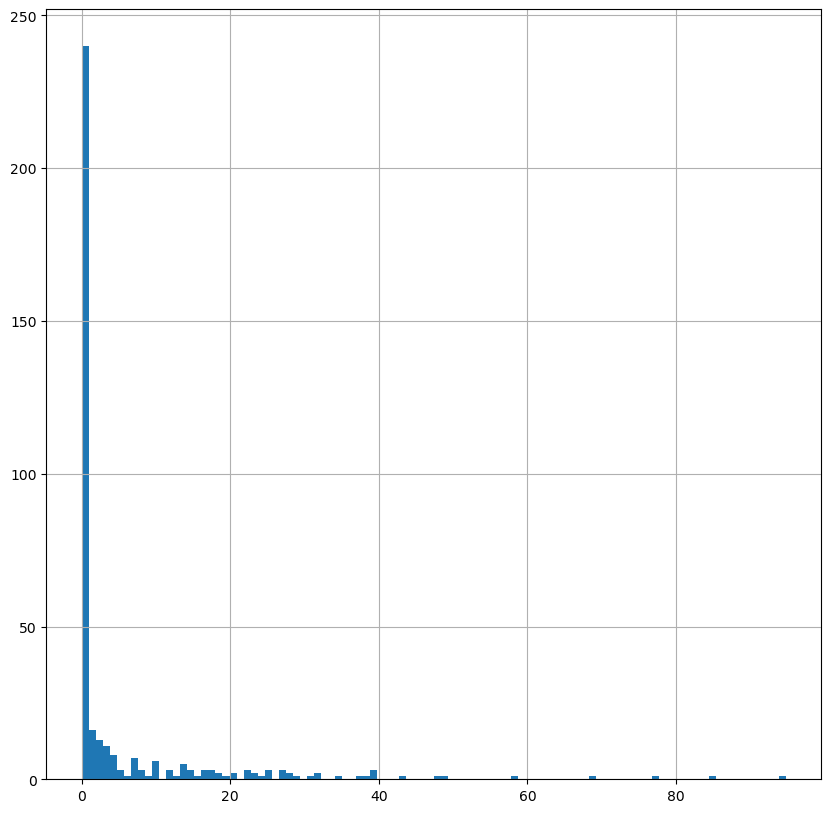

In [14]:
df1['Precipitacao (mm)'].hist(bins=100,figsize=(10,10))
plt.show()

In [15]:
print(df1['Precipitacao (mm)'][df1['Precipitacao (mm)']==0].value_counts())

Precipitacao (mm)
0.0    218
Name: count, dtype: int64


#### We can see out of 365, 218 values are 0

### We can see how the data is mostly skewed thus having so many outliers. It can also be possible that the values with 0 percipitation are the instance where percipitation was not recorded. Lets clip all the values over 40 in column 'Precipitacao (mm)' to 40.

In [28]:
import numpy as np
df1['Precipitacao (mm)'] = np.clip(df1['Precipitacao (mm)'], 0, 40)

#### Calculate correlation and compare

In [33]:
import seaborn as sns
correlation = df1.corr()
sns.heatmap(correlation, annot = True)

<Axes: >

All the features are showing a high correlation with the output feature except the 'Month' feature. In the case of the 'Precipitacao (mm)' feature, which has lots of
values as 0, still, it is showing quite good correlation, and hence we will keep it

#### Split the data into training and testing datasets

In [34]:
from sklearn.model_selection import train_test_split
X= df1.drop(columns=['Consumo de cerveja (litros)'],axis=1)
y= df1['Consumo de cerveja (litros)']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
X

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Month,day
0,1.912508,2.281333,1.365781,-0.479960,-0.631243,-1.602745,0.000000
1,1.824340,2.493924,1.597722,-0.479960,-0.631243,-1.602745,0.500686
2,1.131590,1.749853,0.762735,-0.479960,1.584177,-1.602745,1.001373
3,0.867085,1.430966,0.461212,-0.355796,1.584177,-1.602745,1.502059
4,0.816703,1.253806,0.391630,-0.479960,-0.631243,-1.602745,-1.502059
...,...,...,...,...,...,...,...
360,0.873383,1.289238,0.368436,0.927235,1.584177,1.587648,1.502059
361,0.445137,1.289238,0.020525,-0.479960,-0.631243,1.587648,-1.502059
362,0.142846,1.005782,-0.582521,0.585783,-0.631243,1.587648,-1.001373
363,0.048380,0.651463,-0.976820,0.171902,-0.631243,1.587648,-0.500686


In [36]:
X.dtypes

Temperatura Media (C)     float64
Temperatura Minima (C)    float64
Temperatura Maxima (C)    float64
Precipitacao (mm)         float64
Final de Semana           float64
Month                     float64
day                       float64
dtype: object

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

### Train the model

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor

In [47]:
models = {
    '    Linear Regression': LinearRegression(),
    '     Ridge Regression': Ridge(),
    '     Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    '       SGD Regression': SGDRegressor(),
    '     Huber Regression': HuberRegressor()
}

for model in models.values():
    model.fit(X_train, y_train)


In [48]:
for name, model in models.items():
    print(name + " R^2 Score: {:.4f}".format(model.score(X_test, y_test)))


    Linear Regression R^2 Score: 0.6914
     Ridge Regression R^2 Score: 0.6928
     Lasso Regression R^2 Score: 0.5763
ElasticNet Regression R^2 Score: 0.5669
       SGD Regression R^2 Score: 0.6957
     Huber Regression R^2 Score: 0.6744


### Evaluate the mode

Predict the consumption for the test data

Evaluate the model using R2 score

Evaluate the model using Mean Absolute Error

Evaluate the model using Root Mean Squared Error